In [25]:
%pip install -q --proxy http://proxy:80 statsmodels

Note: you may need to restart the kernel to use updated packages.


In [145]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
######## Search space #########
import sys
sys.path.append("../")
from search_space.RegNet import RegNet
from search_space.utils import create_widths_plot, scatter_results
# Initialize an empty list to store dictionaries
def results_to_df(path, name):
    data = []
    # Open the text file
    with open(path, 'r') as file:
        lines = file.readlines()
        # Initialize an empty dictionary to store data for each block
        block_data = {}
        for line in lines:
            # If the line contains dashes, it indicates the end of a block
            if '-------------------------' in line:
                # If block_data is not empty, add it to the list of data dictionaries
                if block_data:
                    data.append(block_data)
                    # Reset block_data for the next block
                    block_data = {}
            elif 'best_acc' in line:
                continue
            else:
                # Split the line by ':'
                #print(line)
                key, value = line.strip().split(': ')
                # Store the key-value pair in the block_data dictionary
                block_data[key] = value

    # Create a DataFrame from the list of dictionaries
    df = pd.DataFrame(data)

    # Convert columns to appropriate data types if needed
    df['epoch'] = df['epoch'].astype(int)
    df['lr'] = df['lr'].astype(float)
    df['train_acc'] = df['train_acc'].astype(float)
    df['train_loss'] = df['train_loss'].astype(float)
    df['test_acc'] = df['test_acc'].astype(float)
    df['test_acc_top5'] = df['test_acc_top5'].astype(float)
    df['test_loss'] = df['test_loss'].astype(float)
    df['epoch_time'] = df['epoch_time'].astype(float)
    df=df.assign(name=name)
    
    return df
def percentage_of_elements_in_list(list1, list2):
    # Count the number of elements in list1 that are also in list2
    common_elements_count = sum(1 for element in list1 if element in list2)
    # Calculate the percentage
    percentage = (common_elements_count / len(list1)) * 100
    return percentage


import os
def get_vainilla_dfs(folder, epochs):
    students=os.listdir(folder)
    print(students)
    sudents=[student for student in students if "ipynb_checkpoints" not in student]
    students_df=[]
    for student in students:
        try:
            students_df.append(results_to_df(f"{folder}/{student}/worklog.txt", student))
        except:
            pass
    students_df=pd.concat(students_df, ignore_index=True)
    students_df=students_df.sort_values(by=["epoch","test_acc"], ascending=[False,False])
    students_df=students_df.assign(study="vainilla")
    
    idx = students_df.groupby("name")["test_acc"].idxmax()
    #idx = students_df.groupby("name")["epoch"].idxmax()
    max_test_acc_rows = students_df.loc[idx]
    sorted_df=max_test_acc_rows.sort_values(by="test_acc")
    sorted_df=sorted_df.rename(columns={"test_acc":"best_acc"})
    order_students=list(sorted_df.name.values)

    vainilla_students=[]
    students_df["name"] = pd.Categorical(students_df["name"], categories=order_students, ordered=True)
    for i in range(1,epochs+1):
        vainilla_students.append(students_df[students_df.epoch==i].sort_values(by="name")) 
    
    corr_coeff_vainilla=[]
    for epoch in vainilla_students:
        correlation_coefficient =np.corrcoef(list(epoch['test_acc'].values),list(sorted_df['best_acc'].values))
        corr_coeff_vainilla.append(correlation_coefficient[0,1])
    return order_students, sorted_df, vainilla_students, corr_coeff_vainilla


def get_students_dfs(folder, epochs, match_word,order_students,study, corr=False, corr_n=20):
    students_list=os.listdir(folder)
    students_kd=[student for student in students_list if match_word in student]
    students_kd_df=[]

    for student in students_kd:
        students_kd_df.append(results_to_df(f"{folder}/{student}/worklog.txt", student))
    students_kd_df=pd.concat(students_kd_df, ignore_index=True)
    students_kd_df=students_kd_df.sort_values(by=["epoch","test_acc"], ascending=[False,False])
    students_kd_df=students_kd_df.assign(study=study)
    
    students_kd_df['name']=students_kd_df['name'].str.split('_').str[1:3].str.join('_')

    kd_students=[]
    students_kd_df["name"] = pd.Categorical(students_kd_df["name"], categories=order_students, ordered=True)
    for i in range(1,epochs+1):
        kd_students.append(students_kd_df[students_kd_df.epoch==i].sort_values(by="name")) 

    corr_coeff_kd=[]
    if corr==True:
        for epoch in kd_students:
            correlation_coefficient =np.corrcoef(list(epoch['test_acc'].values[:corr_n]),list(sorted_df['best_acc'].values[:corr_n]))
            corr_coeff_kd.append(correlation_coefficient[0,1])    
    return kd_students, corr_coeff_kd

In [133]:
metadata={"num_classes": 4, "input_shape": [49260, 3, 64, 64], "codename": "Caitie", "benchmark":47.008}
regnet_space=RegNet(metadata,
                    W0=[8, 56, 8],
                    WA=[8, 48, 8],
                    WM=[2.0,2.9,0.05],
                    D=[6,20,1], 
                    G=[8,8,8], 
                    base_config="../configs/search_space/config.yaml")

In [155]:
#WA,W0,WM,DEPTH=48,24,2.4,12
test_folder="tests_one_model"
generation=1
#config_updates=["REGNET.STEM_W",32, "MODEL.NUM_CLASSES",20]
config_updates=None
models, chromosomes=regnet_space.load_generation(folder=f"{test_folder}/Generation_{generation}_SE", config_updates=config_updates)


res_bottleneck_block
{'bot_mul': 1.0, 'group_w': 8, 'se_r': 0.25, 'downsample': 'avg', 'drop_path_rate': 0.0}
{'bot_mul': 1.0, 'group_w': 8, 'se_r': 0.25, 'downsample': 'avg', 'drop_path_rate': 0.0}
{'bot_mul': 1.0, 'group_w': 8, 'se_r': 0.25, 'downsample': 'avg', 'drop_path_rate': 0.0}
{'bot_mul': 1.0, 'group_w': 8, 'se_r': 0.25, 'downsample': 'avg', 'drop_path_rate': 0.0}
{'bot_mul': 1.0, 'group_w': 8, 'se_r': 0.25, 'downsample': 'avg', 'drop_path_rate': 0.0}
{'bot_mul': 1.0, 'group_w': 8, 'se_r': 0.25, 'downsample': 'avg', 'drop_path_rate': 0.0}
{'stem_type': 'res_stem_cifar', 'stem_w': 32, 'block_type': 'res_bottleneck_block', 'depths': [1, 1, 3, 4, 9, 2], 'widths': [8, 72, 144, 288, 592, 1216], 'strides': [2, 2, 2, 2, 2, 2], 'bot_muls': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'group_ws': [8, 8, 8, 8, 8, 8], 'head_w': 0, 'se_r': 0.25, 'num_classes': 20, 'downsample': 'avg', 'drop_path_rate': 0.0}
Loading model: tests_one_model/Generation_1_SE/olive_wasp/config.yaml
res_bottleneck_block
res

In [9]:
chromosomes[list(chromosomes.keys())[0]]

{'ws': [24, 48, 96, 192, 384, 768],
 'bs': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'gs': [8, 8, 8, 8, 8, 8],
 'ds': [1, 1, 1, 4, 6, 5],
 'num_stages': 6,
 'total_size_mb': 39.516258239746094,
 'h': 1,
 'w': 1,
 'flops': 1812518,
 'params': 10358950,
 'acts': 8678,
 'WA': 40.0,
 'W0': 24,
 'WM': 2.0,
 'DEPTH': 18,
 'GROUP_W': 8}

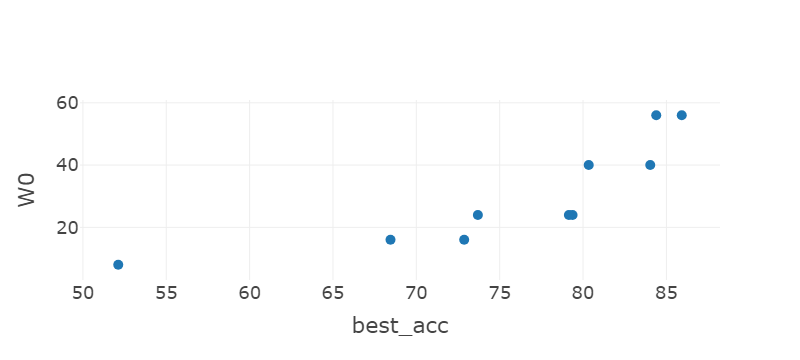

In [21]:
scatter_results(chromosomes,  "W0","best_acc","tests_one_model/Generation_1_NOSE_D/results.csv")

# AddNIST results

In [17]:
#sorted_df["NOSE_D"].to_csv("tests_one_model/Generation_1_NOSE_D/results.csv")

In [15]:
folders=["tests_one_model/Generation_1_SE","tests_one_model/Generation_1_SE_D","tests_one_model/Generation_1_NOSE_D","tests_one_model/Generation_1_NOSE_NOD","tests_one_model/Generation_1_NOSE_D_DropPath"]
sorted_df={}
corr_coeff_vainilla={}
vainilla_students={}
for folder in folders:
    name=f"{folder.split("/")[1][13:]}"
    order_students, sorted_df[name], vainilla_students[name], corr_coeff=get_vainilla_dfs(folder, 20)
    sorted_df[name]["study"]=name
    sorted_df[name]= sorted_df[name].reset_index().reset_index()
    corr_coeff_vainilla[name]=pd.DataFrame(corr_coeff).reset_index()
    corr_coeff_vainilla[name]["study"]=name

['olive_wasp', 'hospitable_pronghorn', 'spectral_hare', 'loyal_tiger', 'astute_badger', 'quizzical_caiman', 'zircon_toad', 'hypersonic_sambar', 'honest_saluki', 'neat_puffin']
['olive_wasp', 'hospitable_pronghorn', 'spectral_hare', 'loyal_tiger', 'astute_badger', 'quizzical_caiman', 'zircon_toad', 'hypersonic_sambar', 'honest_saluki', 'neat_puffin']
['olive_wasp', 'hospitable_pronghorn', 'spectral_hare', 'loyal_tiger', 'astute_badger', 'quizzical_caiman', 'zircon_toad', 'hypersonic_sambar', 'honest_saluki', 'neat_puffin']
['olive_wasp', 'hospitable_pronghorn', 'spectral_hare', 'loyal_tiger', 'astute_badger', 'quizzical_caiman', 'zircon_toad', 'hypersonic_sambar', 'honest_saluki', 'neat_puffin']
['olive_wasp', 'hospitable_pronghorn', 'spectral_hare', '.ipynb_checkpoints', 'loyal_tiger', 'astute_badger', 'quizzical_caiman', 'zircon_toad', 'hypersonic_sambar', 'honest_saluki', 'neat_puffin']


In [4]:
sorted_df.keys()

dict_keys(['SE', 'SE_D', 'NOSE_D', 'NOSE_NOD', 'NOSE_D_DropPath'])

In [30]:
sorted_df["SE_D"]

,level_0,index,epoch,lr,train_acc,train_loss,best_acc,test_acc_top5,test_loss,epoch_time,name,study
0,0,19,20,0.000062,53.00,1.44,55.15,88.16,2.14,100.40,olive_wasp,SE_D
1,1,179,20,0.000062,65.67,1.07,67.59,93.57,1.03,59.84,honest_saluki,SE_D
2,2,37,18,0.000545,75.44,0.77,72.29,92.82,2.01,77.46,hospitable_pronghorn,SE_D
3,3,139,20,0.000062,70.56,0.91,73.15,95.58,0.86,61.89,zircon_toad,SE_D
4,4,199,20,0.000062,75.11,0.79,76.77,96.22,0.76,53.18,neat_puffin,SE_D
5,5,79,20,0.000062,78.45,0.69,78.40,96.75,0.71,49.08,loyal_tiger,SE_D
6,6,99,20,0.000062,80.46,0.62,79.89,97.02,0.65,66.75,astute_badger,SE_D
7,7,59,20,0.000062,85.02,0.48,81.80,95.77,2.04,74.22,spectral_hare,SE_D
8,8,158,19,0.000245,83.17,0.54,82.24,96.77,1.30,62.14,hypersonic_sambar,SE_D
9,9,118,19,0.000245,87.55,0.39,85.37,97.66,0.63,80.56,quizzical_caiman,SE_D


In [5]:
vainilla_students["NOSE_D"][1]

,epoch,lr,train_acc,train_loss,test_acc,test_acc_top5,test_loss,epoch_time,name,study
1,2,0.009938,11.80,2.81,14.09,50.73,3.00,84.26,olive_wasp,vainilla
161,2,0.009938,18.76,2.43,22.97,63.55,2.30,48.74,honest_saluki,vainilla
121,2,0.009938,17.47,2.49,21.18,63.81,2.35,51.51,zircon_toad,vainilla
181,2,0.009938,19.60,2.35,22.83,66.20,2.24,45.13,neat_puffin,vainilla
81,2,0.009938,19.25,2.38,23.13,65.87,2.26,55.00,astute_badger,vainilla
61,2,0.009938,20.63,2.34,21.98,60.63,2.40,40.77,loyal_tiger,vainilla
21,2,0.009938,19.56,2.39,21.53,63.01,2.34,62.23,hospitable_pronghorn,vainilla
141,2,0.009938,21.63,2.33,23.29,65.41,2.28,50.36,hypersonic_sambar,vainilla
41,2,0.009938,19.87,2.36,21.12,63.83,2.34,62.61,spectral_hare,vainilla
101,2,0.009938,21.43,2.31,21.78,62.45,2.50,71.78,quizzical_caiman,vainilla


In [3]:
ep=0
scatter_df=pd.concat([sorted_df["SE"],sorted_df["SE_D"],sorted_df["NOSE_D"],sorted_df["NOSE_NOD"],sorted_df["NOSE_D_DropPath"]])
#scatter_df=pd.merge(scatter_df, sorted_df[["name","best_acc"]], on="name")

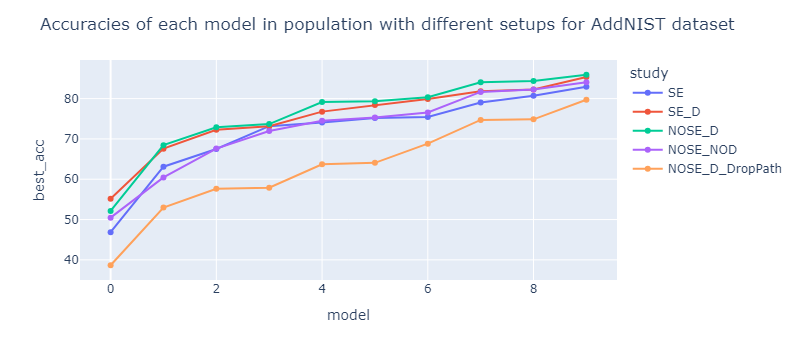

In [11]:
import plotly.express as px

fig = px.line(scatter_df,x="level_0", y="best_acc",color='study', markers=True)
#fig.add_scatter(x=x, y=y_std, mode='markers', name='Data2',trendline="ols", marker=dict(color='green'))
fig.update_layout(height=700)
fig.update_layout(xaxis_title='model', title="Accuracies of each model in population with different setups for AddNIST dataset")
fig.show()

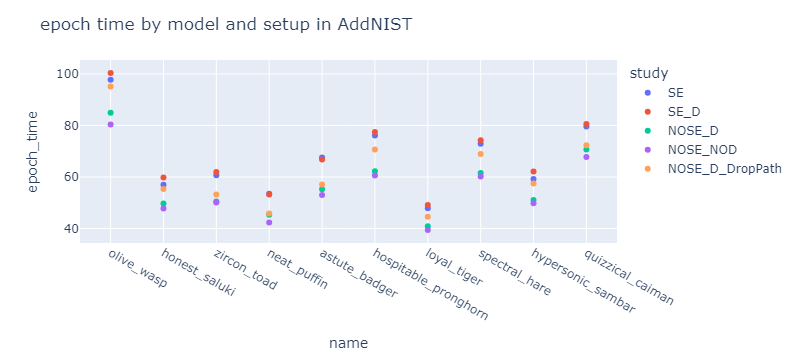

In [14]:
import plotly.express as px

fig = px.scatter(scatter_df,x="name", y="epoch_time",color='study')
#fig.add_scatter(x=x, y=y_std, mode='markers', name='Data2',trendline="ols", marker=dict(color='green'))
fig.update_layout(height=500, title="epoch time by model and setup in AddNIST")
fig.show()

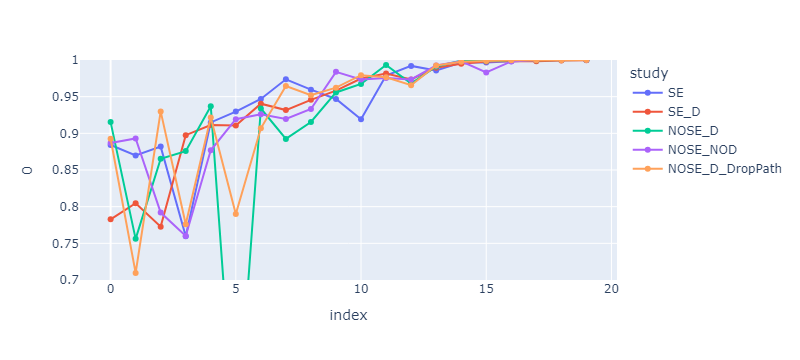

In [31]:
import plotly.express as px
scatter_df=pd.concat([corr_coeff_vainilla["SE"],corr_coeff_vainilla["SE_D"],corr_coeff_vainilla["NOSE_D"],corr_coeff_vainilla["NOSE_NOD"], corr_coeff_vainilla["NOSE_D_DropPath"]])
fig = px.line(scatter_df,x="index", y=0,color='study', markers=True)
#fig.add_scatter(x=x, y=y_std, mode='markers', name='Data2',trendline="ols", marker=dict(color='green'))
fig.update_layout(height=800)
fig.update_yaxes(range=[0.7, 1]) 
fig.show()

In [47]:
sorted_df["NOSE_D"]

,level_0,index,epoch,lr,train_acc,train_loss,best_acc,test_acc_top5,test_loss,epoch_time,name,study
0,0,19,20,0.000062,50.28,1.50,52.12,87.22,1.48,84.96,olive_wasp,NOSE_D
1,1,179,20,0.000062,66.92,1.04,68.45,94.04,1.01,49.73,honest_saluki,NOSE_D
2,2,139,20,0.000062,72.22,0.88,72.87,95.31,0.86,50.45,zircon_toad,NOSE_D
3,3,199,20,0.000062,72.65,0.87,73.69,95.42,0.84,45.29,neat_puffin,NOSE_D
4,4,99,20,0.000062,79.15,0.66,79.15,96.95,0.68,55.19,astute_badger,NOSE_D
5,5,79,20,0.000062,78.70,0.68,79.37,96.85,0.68,40.92,loyal_tiger,NOSE_D
6,6,39,20,0.000062,81.00,0.61,80.34,97.11,0.64,62.21,hospitable_pronghorn,NOSE_D
7,7,159,20,0.000062,85.35,0.47,84.03,97.83,0.53,51.02,hypersonic_sambar,NOSE_D
8,8,59,20,0.000062,85.62,0.46,84.39,97.95,0.52,61.56,spectral_hare,NOSE_D
9,9,119,20,0.000062,87.78,0.39,85.92,98.35,0.47,70.71,quizzical_caiman,NOSE_D


# CIFARTile

In [176]:
#WA,W0,WM,DEPTH=48,24,2.4,12
test_folder="tests_filtered_regnet"
generation=1
#config_updates=["REGNET.STEM_W",32, "MODEL.NUM_CLASSES",20]
config_updates=None
models, chromosomes=regnet_space.load_generation(folder=f"{test_folder}/Generation_{generation}", config_updates=config_updates)


res_bottleneck_block
{'bot_mul': 1.0, 'group_w': 16, 'se_r': 0.25, 'downsample': 'avg', 'drop_path_rate': 0.0}
{'bot_mul': 1.0, 'group_w': 16, 'se_r': 0.25, 'downsample': 'avg', 'drop_path_rate': 0.0}
{'bot_mul': 1.0, 'group_w': 16, 'se_r': 0.25, 'downsample': 'avg', 'drop_path_rate': 0.0}
{'bot_mul': 1.0, 'group_w': 16, 'se_r': 0.25, 'downsample': 'avg', 'drop_path_rate': 0.0}
{'stem_type': 'res_stem_cifar', 'stem_w': 28, 'block_type': 'res_bottleneck_block', 'depths': [1, 4, 6, 8], 'widths': [32, 64, 144, 288], 'strides': [2, 2, 2, 2], 'bot_muls': [1.0, 1.0, 1.0, 1.0], 'group_ws': [16, 16, 16, 16], 'head_w': 0, 'se_r': 0.25, 'num_classes': 20, 'downsample': 'avg', 'drop_path_rate': 0.0}
Loading model: tests_filtered_regnet/Generation_1/steel_rook/config.yaml
res_bottleneck_block
res_bottleneck_block
{'bot_mul': 1.0, 'group_w': 16, 'se_r': 0.25, 'downsample': 'avg', 'drop_path_rate': 0.0}
{'bot_mul': 1.0, 'group_w': 16, 'se_r': 0.25, 'downsample': 'avg', 'drop_path_rate': 0.0}
{'stem_

In [141]:
folders=["tests_cifar_tile/Generation_1_SE_D"]
sorted_df={}
corr_coeff_vainilla={}
vainilla_students={}
for folder in folders:
    name=f"{folder.split("/")[1][13:]}"
    order_students, sorted_df[name], vainilla_students[name], corr_coeff=get_vainilla_dfs(folder, 20)
    sorted_df[name]["study"]=name
    sorted_df[name]= sorted_df[name].reset_index().reset_index()
    corr_coeff_vainilla[name]=pd.DataFrame(corr_coeff).reset_index()
    corr_coeff_vainilla[name]["study"]=name

['wakeful_mongoose', 'didactic_zebu', 'lime_vulture', 'enormous_limpet', 'happy_raven', 'unselfish_ermine', 'dynamic_wasp', 'heavenly_squirrel', 'angelic_lizard', 'loutish_tiger', 'flying_capuchin', 'ultra_herring', 'whimsical_lemming', 'poetic_poodle', 'umber_binturong', 'magic_sidewinder', 'results.csv', 'agile_barracuda', 'invaluable_cormorant', 'optimal_elk', 'phenomenal_dragon']


In [17]:
#sorted_df["SE_D"].to_csv("tests_cifar_tile/Generation_1_SE_D/results.csv")

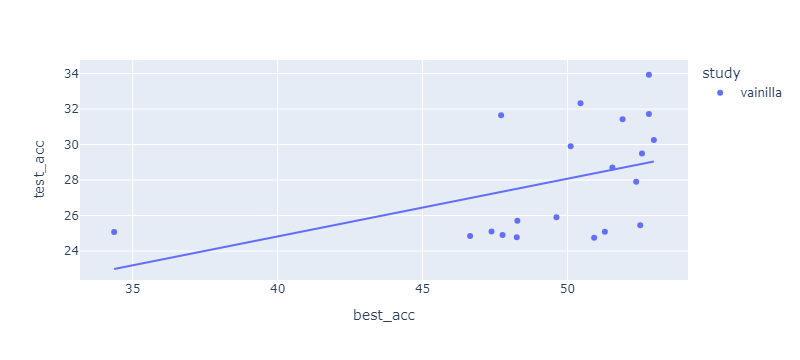

In [142]:
scatter_df=vainilla_students["SE_D"][0]
scatter_df=pd.merge(scatter_df, sorted_df["SE_D"][["name","best_acc"]], on="name")
import plotly.express as px
fig = px.scatter(scatter_df,x="best_acc", y="test_acc",color='study', trendline="ols")
#fig.add_scatter(x=x, y=y_std, mode='markers', name='Data2',trendline="ols", marker=dict(color='green'))
fig.show()

In [45]:
sorted_df["SE_D"]

,level_0,index,epoch,lr,train_acc,train_loss,best_acc,test_acc_top5,test_loss,epoch_time,name,study
0,0,18,19,0.000245,34.12,1.33,34.36,60.33,1.36,99.20,wakeful_mongoose,SE_D
1,1,198,19,0.000245,46.03,1.13,46.64,74.61,1.13,57.74,loutish_tiger,SE_D
2,2,158,19,0.000245,47.68,1.11,47.38,75.10,1.23,97.15,heavenly_squirrel,SE_D
3,3,37,18,0.000545,48.02,1.10,47.71,75.91,1.11,58.32,didactic_zebu,SE_D
4,4,219,20,0.000062,47.29,1.12,47.76,75.88,1.11,79.02,flying_capuchin,SE_D
5,5,139,20,0.000062,48.78,1.09,48.25,76.26,1.11,87.65,dynamic_wasp,SE_D
6,6,319,20,0.000062,49.48,1.08,48.27,75.87,1.19,108.61,magic_sidewinder,SE_D
7,7,78,19,0.000245,50.59,1.05,49.62,77.84,1.07,89.99,enormous_limpet,SE_D
8,8,98,19,0.000245,50.80,1.06,50.11,77.89,1.58,114.49,happy_raven,SE_D
9,9,398,19,0.000245,51.16,1.05,50.45,78.41,1.07,59.70,phenomenal_dragon,SE_D


In [18]:
corr_coeff_vainilla[name]

,index,0,study
0,0,0.431218,SE_D
1,1,0.520268,SE_D
2,2,0.694358,SE_D
3,3,0.702453,SE_D
4,4,0.782447,SE_D
5,5,0.925774,SE_D
6,6,0.918044,SE_D
7,7,0.888181,SE_D
8,8,0.939186,SE_D
9,9,0.976391,SE_D


In [173]:
def scatter_results(chromosomes,columny,columnx="flops",results_path=None):
    """
    Creates a scatter plot of FLOPS (Floating Point Operations Per Second) versus a specified column's values
    for each chromosome.

    Args:
        chromosomes (dict): A dictionary where keys represent chromosome names and values represent
            information about the chromosome, including FLOPS ('flops'), WA ('Width slope'), W0 ('Initial width'), WM ('Width multiplier'), DEPTH ('Total depth')m.
        column (str): The name of the column from the chromosome information to plot against FLOPS.

    Returns:
        plotly.graph_objs._figure.Figure: A Plotly figure displaying a scatter plot of FLOPS versus
            the specified column's values for each chromosome.

    """
    chromosomes_df=pd.DataFrame(chromosomes).T.reset_index().rename(columns={"index":"name"})
    if results_path is not None:
        results_df=pd.read_csv(results_path, index_col=0)[["name","best_acc","epoch_time"]]
        chromosomes_df=pd.merge(chromosomes_df,results_df, on="name", how="left")
    chromosomes_df["W0/WA"]=chromosomes_df["W0"]/chromosomes_df["WA"]
    chromosomes_df["W0/WA"]=chromosomes_df["W0/WA"].round(2)
    fig = go.Figure(data=go.Scatter(
        x=chromosomes_df[columnx],
        y=chromosomes_df[columny],
        mode='markers',
        #marker=dict(
        #    size=2,
            #color=np.random.randn(500), #set color equal to a variable
            #colorscale='Viridis', # one of plotly colorscales
            #showscale=True
        #),
        marker=dict(
            size=10
        ),
        text=chromosomes_df['name']
    ))
    layout = go.Layout(
        title='',
        xaxis=dict(title=columnx),
        yaxis=dict(title=columny),
        template="presentation"
    )
    fig.layout=layout
    return fig

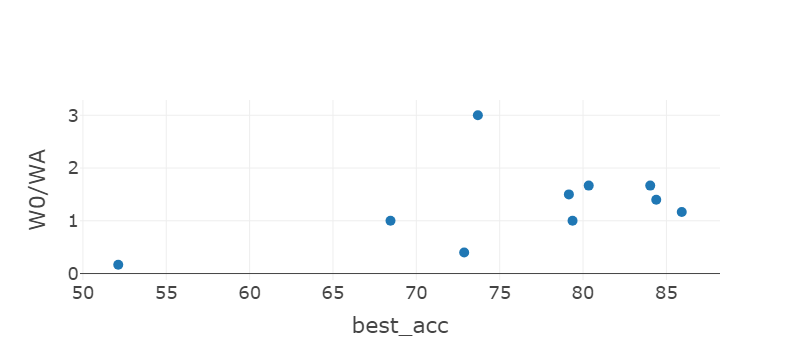

In [156]:
scatter_results(chromosomes,  "W0/WA","best_acc","tests_one_model/Generation_1_NOSE_D/results.csv")

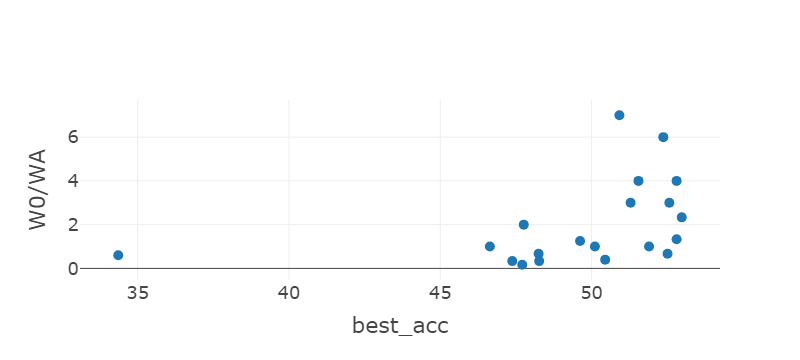

In [154]:
scatter_results(chromosomes,  "W0/WA","best_acc","tests_cifar_tile/Generation_1_SE_D/results.csv")

In [182]:
chromosomes[list(chromosomes.keys())[0]]

{'ws': [32, 64, 144, 288],
 'bs': [1.0, 1.0, 1.0, 1.0],
 'gs': [16, 16, 16, 16],
 'ds': [1, 4, 6, 8],
 'num_stages': 4,
 'total_size_mb': 9.592525482177734,
 'h': 1,
 'w': 1,
 'flops': 385139,
 'params': 2514623,
 'acts': 4275,
 'WA': 16.0,
 'W0': 32,
 'WM': 2.0999999999999996,
 'DEPTH': 19,
 'GROUP_W': 16}

In [11]:
def _generate_regnet(w_a, w_0, w_m, d, q=8):
        """Generates per stage widths and depths from RegNet parameters."""
        assert w_a >= 0 and w_0 > 0 and w_m > 1 and w_0 % q == 0
        # Generate continuous per-block ws
        ws_cont = np.arange(d) * w_a + w_0
        print("ws_cont: ",ws_cont)
        # Generate quantized per-block ws
        ks = np.round(np.log(ws_cont / w_0) / np.log(w_m))
        print("ks: ",ks)
        #print("ks: ",ks)
        ws_all = w_0 * np.power(w_m, ks)
        ws_all = np.round(np.divide(ws_all, q)).astype(int) * q
        print("ws_all:", ws_all)
        # Generate per stage ws and ds (assumes ws_all are sorted)
        ws, ds = np.unique(ws_all, return_counts=True)
        # Compute number of actual stages and total possible stages
        num_stages, total_stages = len(ws), ks.max() + 1
        print("num_stages", num_stages)
        print("total_stages",total_stages)
        # Convert numpy arrays to lists and return
        ws, ds, ws_all, ws_cont = (x.tolist() for x in (ws, ds, ws_all, ws_cont))
        return ws, ds, num_stages, total_stages, ws_all, ws_cont

In [158]:

chromosomes["olive_wasp"]
#chromosomes["honest_saluki"]
#chromosomes["zircon_toad"]
#chromosomes["hypersonic_sambar"]
#hypersonic_zambar
#quizzical_caiman

{'ws': [8, 72, 144, 288, 592, 1216],
 'bs': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'gs': [8, 8, 8, 8, 8, 8],
 'ds': [1, 1, 3, 4, 9, 2],
 'num_stages': 6,
 'total_size_mb': 62.95697021484375,
 'h': 1,
 'w': 1,
 'flops': 2793680,
 'params': 16503792,
 'acts': 11504,
 'WA': 48.0,
 'W0': 8,
 'WM': 2.05,
 'DEPTH': 20,
 'GROUP_W': 8}

In [167]:
_generate_regnet(64, 64, 2.05, 14, q=8)

ws_cont:  [ 64 128 192 256 320 384 448 512 576 640 704 768 832 896]
ks:  [0. 1. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 4. 4.]
ws_all: [  64  128  272  272  272  272  552  552  552  552  552  552 1128 1128]
num_stages 5
total_stages 5.0


([64, 128, 272, 552, 1128],
 [1, 1, 4, 6, 2],
 5,
 5.0,
 [64, 128, 272, 272, 272, 272, 552, 552, 552, 552, 552, 552, 1128, 1128],
 [64, 128, 192, 256, 320, 384, 448, 512, 576, 640, 704, 768, 832, 896])

In [130]:
_generate_regnet(40, 32, 2.2, 14, q=8)

ws_cont:  [ 32  72 112 152 192 232 272 312 352 392 432 472 512 552]
ks:  [0. 1. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 4. 4.]
ws_all: [ 32  72 152 152 152 344 344 344 344 344 344 344 752 752]
num_stages 5
total_stages 5.0


([32, 72, 152, 344, 752],
 [1, 1, 3, 7, 2],
 5,
 5.0,
 [32, 72, 152, 152, 152, 344, 344, 344, 344, 344, 344, 344, 752, 752],
 [32, 72, 112, 152, 192, 232, 272, 312, 352, 392, 432, 472, 512, 552])